# Sensitivity of results for cost factor water transport

## Relative errors mean annual fluxes


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

<Figure size 1280x400 with 0 Axes>

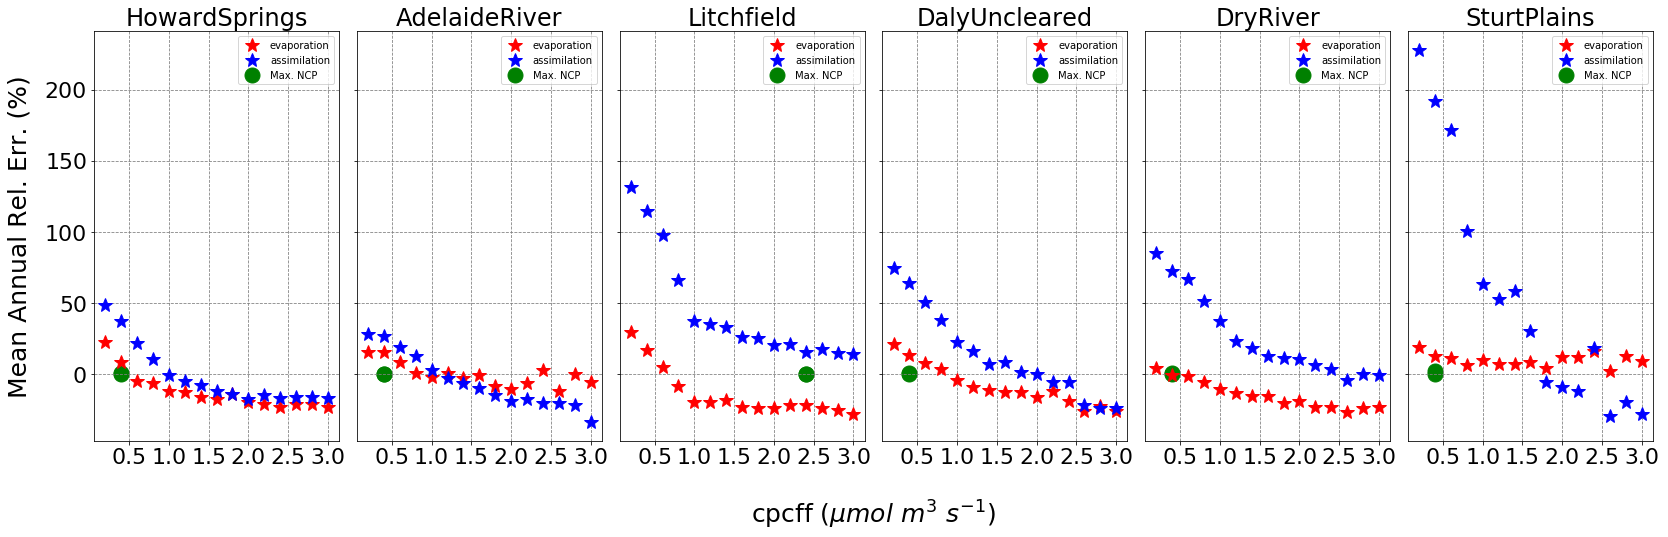

In [3]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True) 


i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]
                ree_ncpmax = ebest_stats[1]
                
            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15, label="evaporation" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15, label="assimilation" )
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site, size=24  );

    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 

    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax[i].legend();

    i = i +1


fig.add_subplot(111, frameon=False);
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()



**Figure S3.1.** Relative errors for mean annual fluxes, for different values of the costfactor for water transport and the different study sites, with assimilation in blue, total evaporation in red, the solution with the highest NCP is marked in green. The relative errors go down for higher values of the costfactor in most cases. The smallest relative error seems to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 


## Timeseries of evaporation

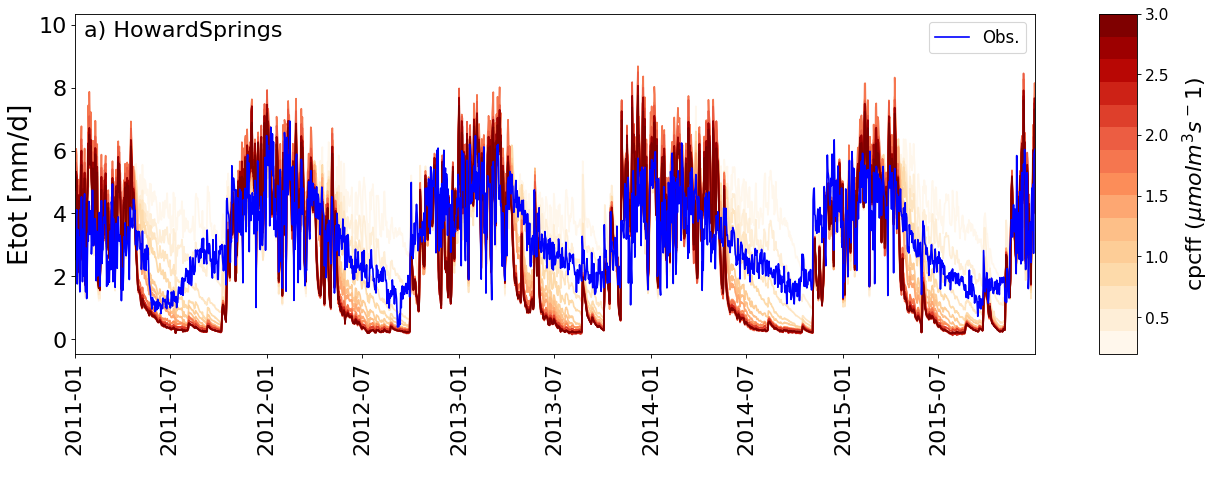

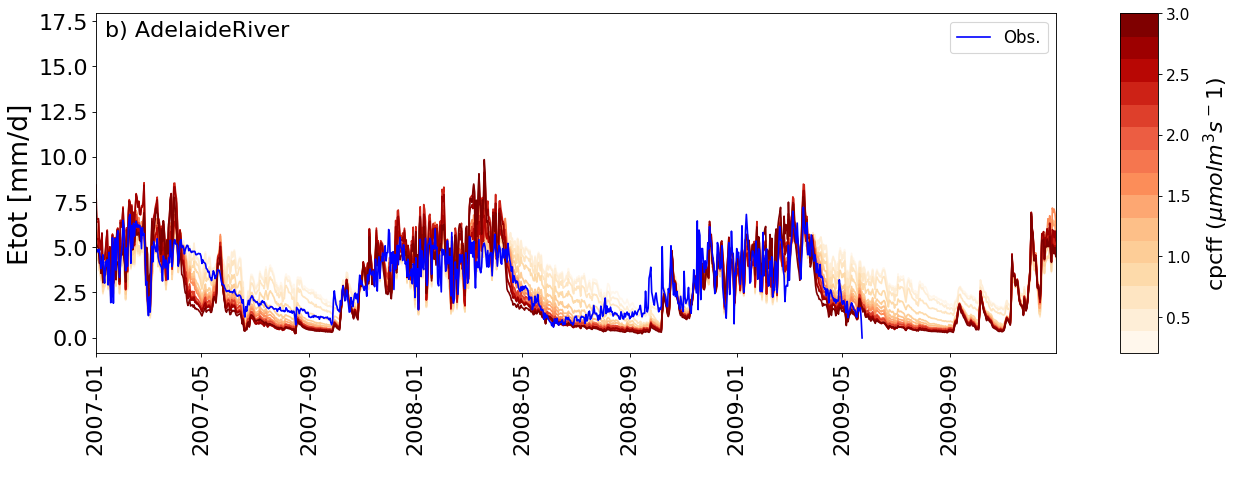

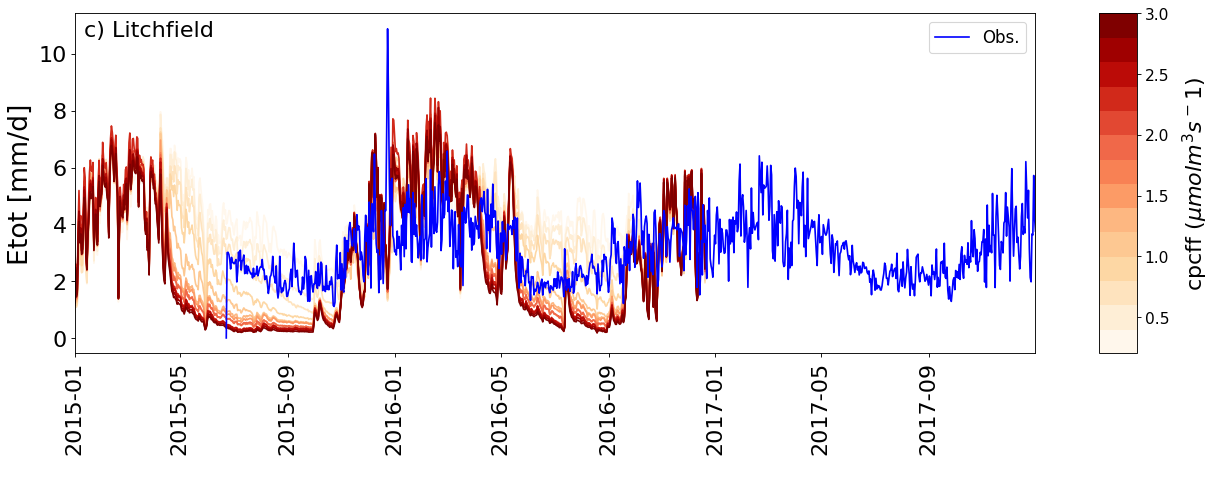

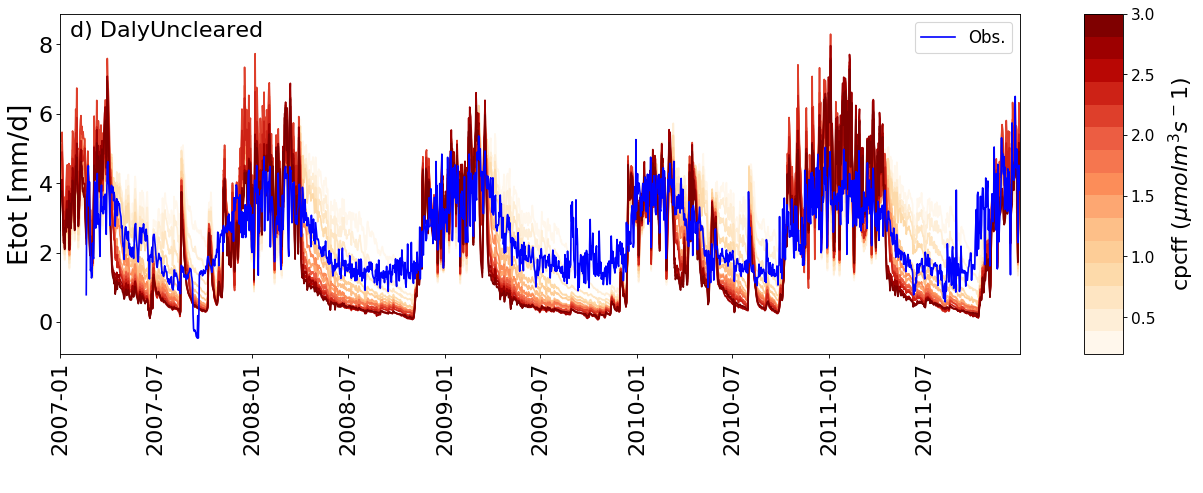

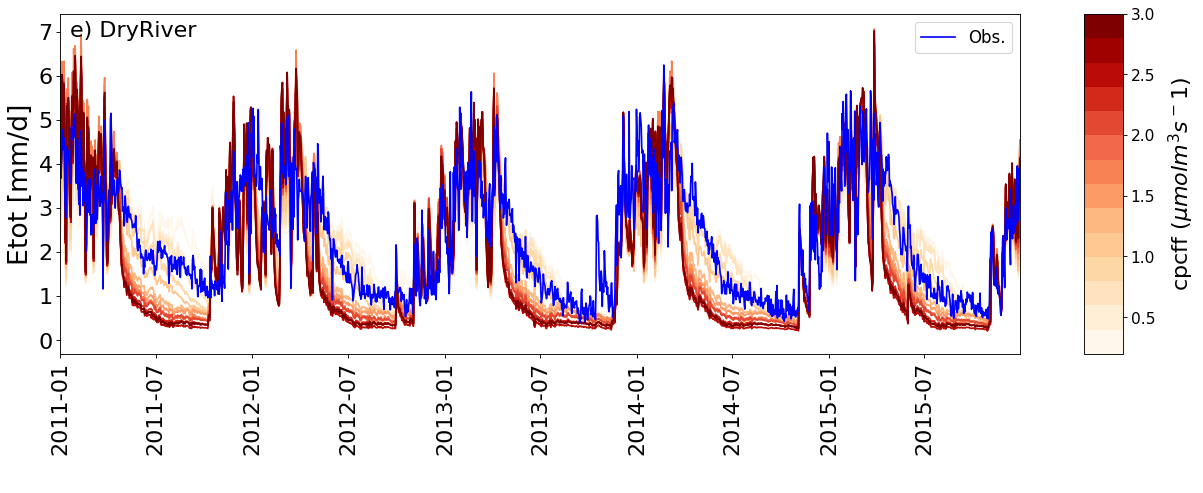

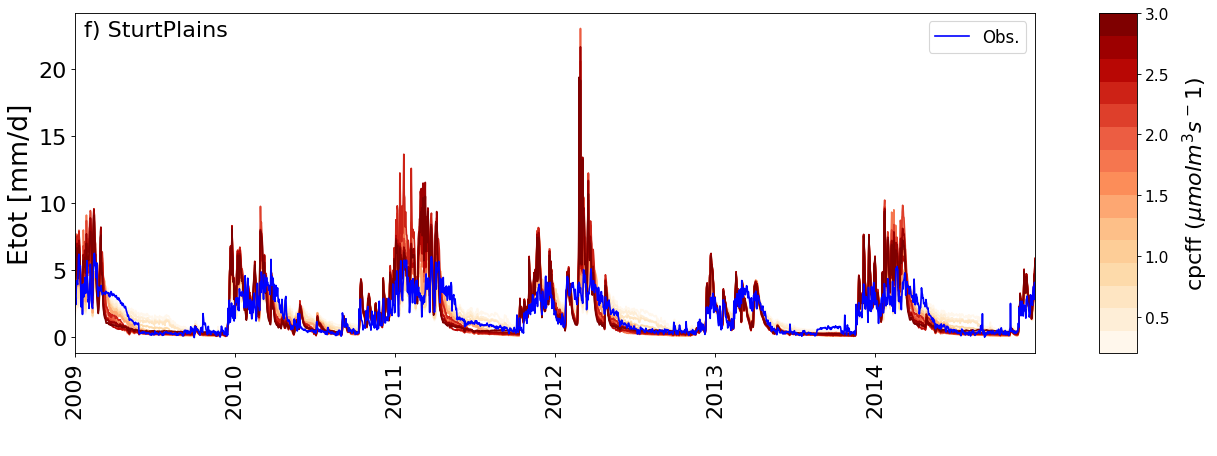

In [4]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$" --labels VOM VOM2 \
--title "a) HowardSprings" --legend True


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) AdelaideRiver" --legend True


#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Litchfield" --legend True
 

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) DalyUncleared" --legend True


#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) DryRiver" --legend True


#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" --cbar_max 3.0 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) SturtPlains" --legend True


**Figure S3.2.** Timeseries of total evaporation for the different sites (a-f) with in blue the fluxtower observations and the VOM-results for different values of the costfactor for water transport (color scale). Generally, there is a reasonable fit for most values of the cost factor with the observations, similar as the plots of relative errors suggest. However, in the transition from the wet to the dry season, a stronger off-set appears for the modelled evaporation. There are hardly any differences for the different cpcff-values during the wet season.

## Timeseries of assimilation

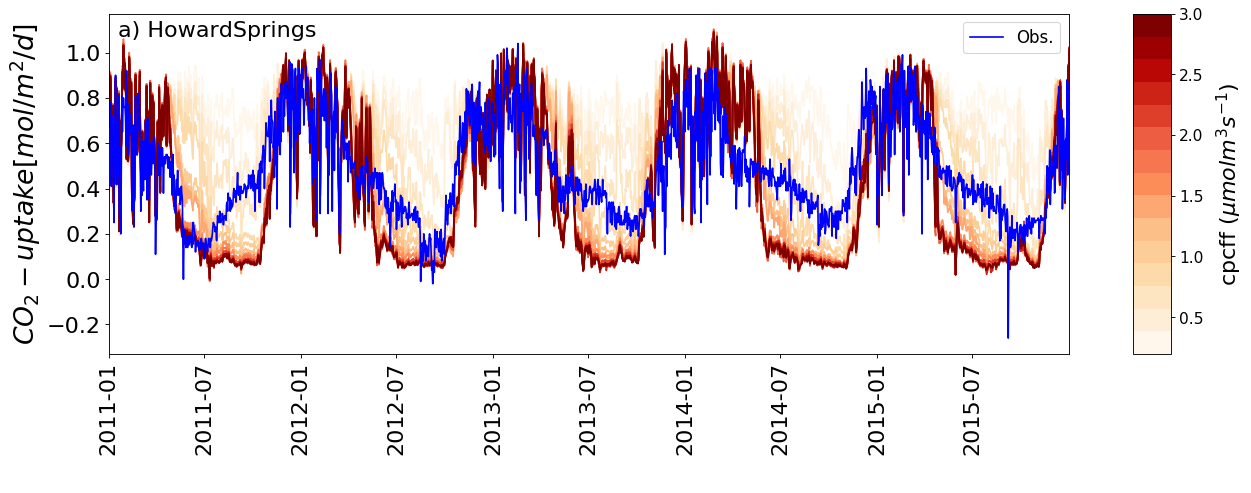

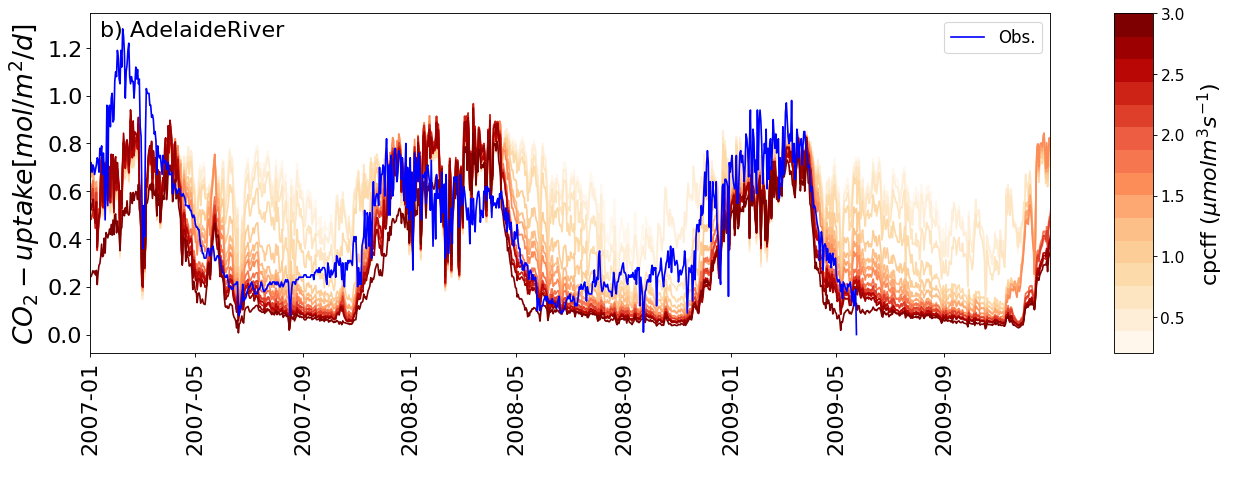

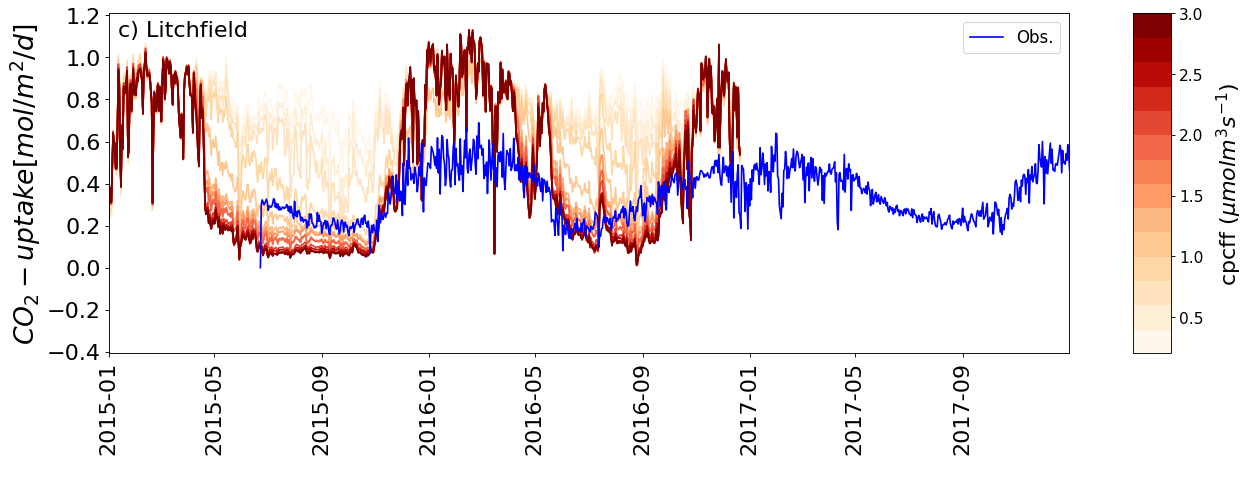

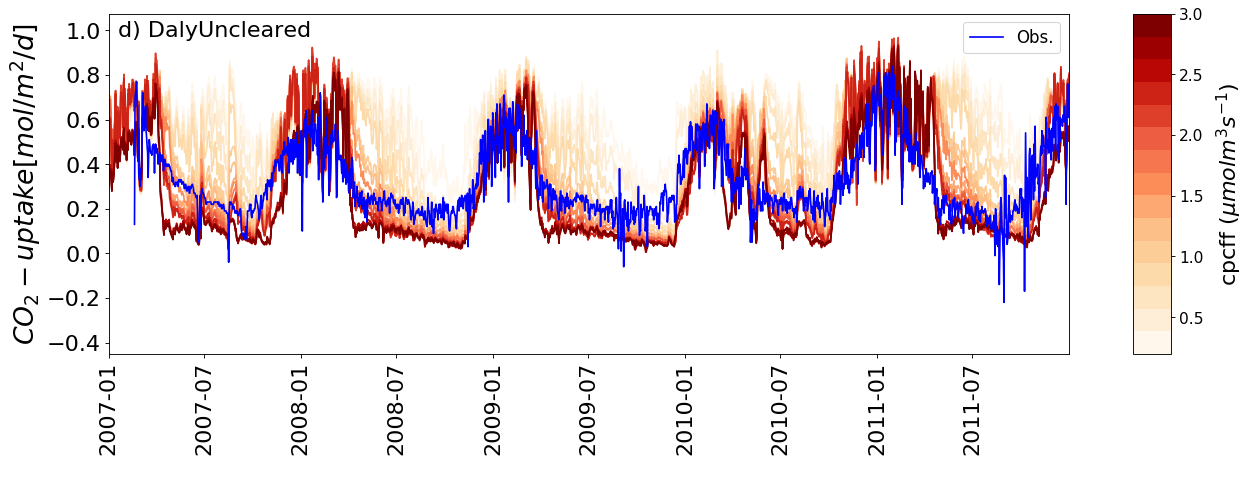

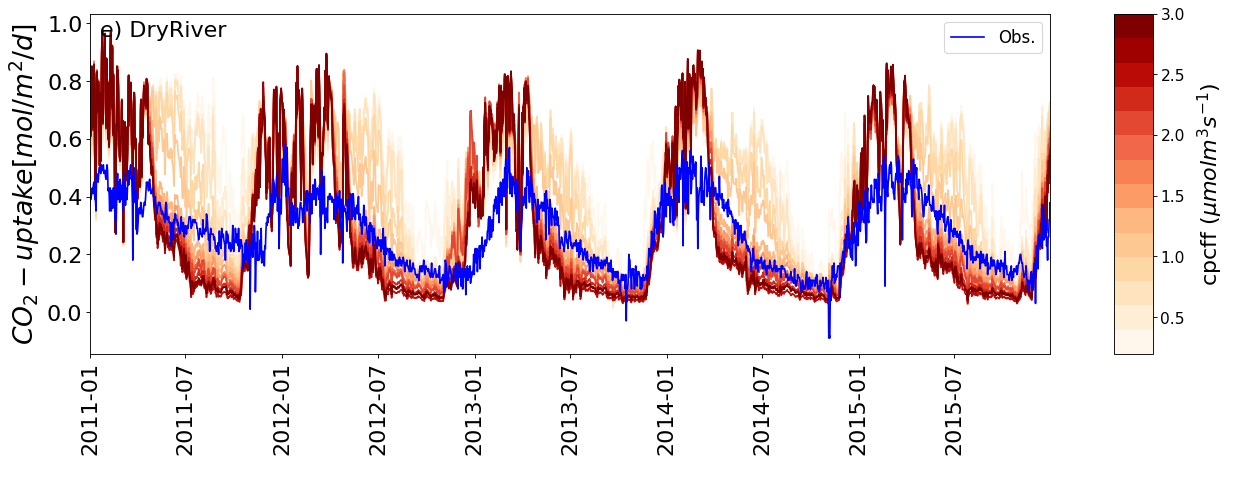

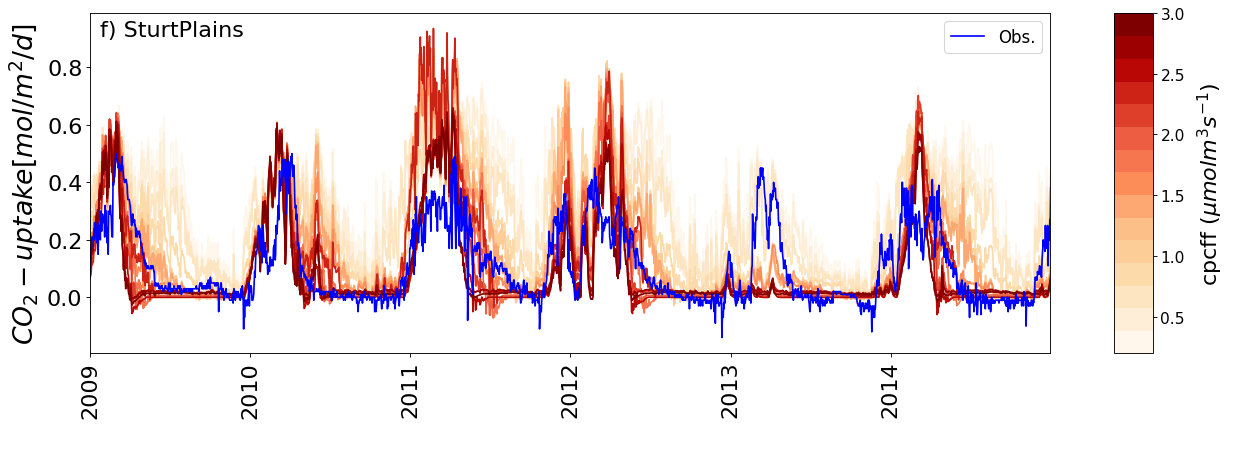

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "a) HowardSprings" --legend True --cbar_max 3.0 \

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) AdelaideRiver" --legend True --cbar_max 3.0 \

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Litchfield" --legend True --cbar_max 3.0 \


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) DalyUncleared" --legend True --cbar_max 3.0 \

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) DryRiver" --legend True --cbar_max 3.0 \

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "$CO_2-uptake [mol/m^2/d]$" \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) SturtPlains" --legend True --cbar_max 3.0 


**Figure S3.3.** Timeseries of total assimilation for the different sites (a-f) with in blue the fluxtower observations and the VOM-results for different values of the costfactor for water transport (color scale). Generally, there is a reasonable fit for most values of the cost factor with the observations. However, for low values of the costfactor the assimilation is stronly overestimated during the dry season, for high values there is often an underestimation of the assimilation. 

## Timeseries of vegetation cover

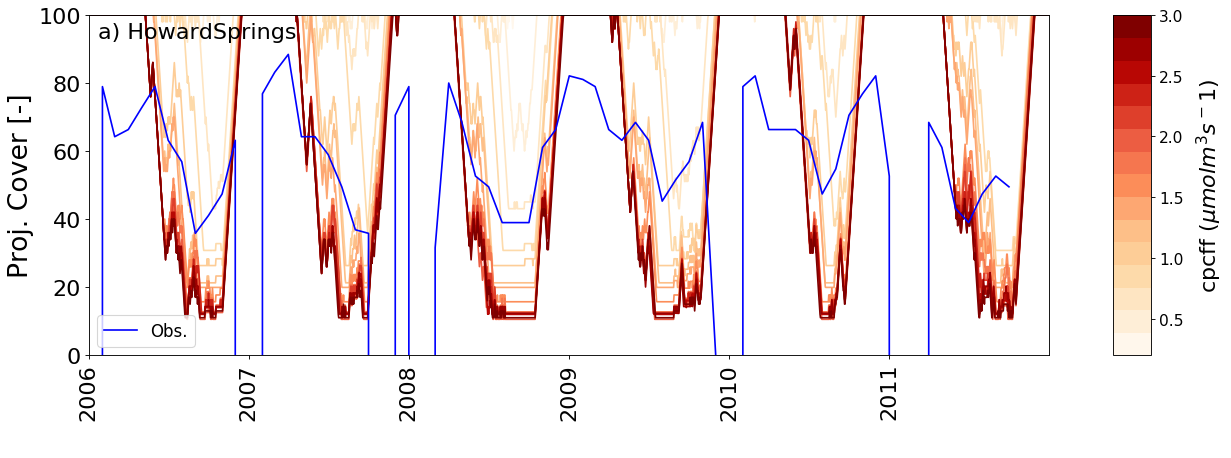

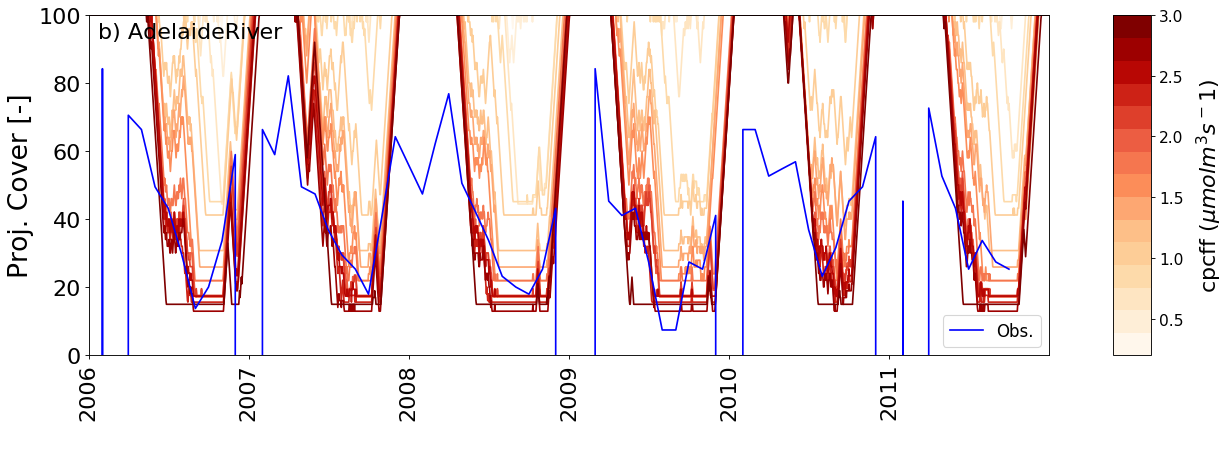

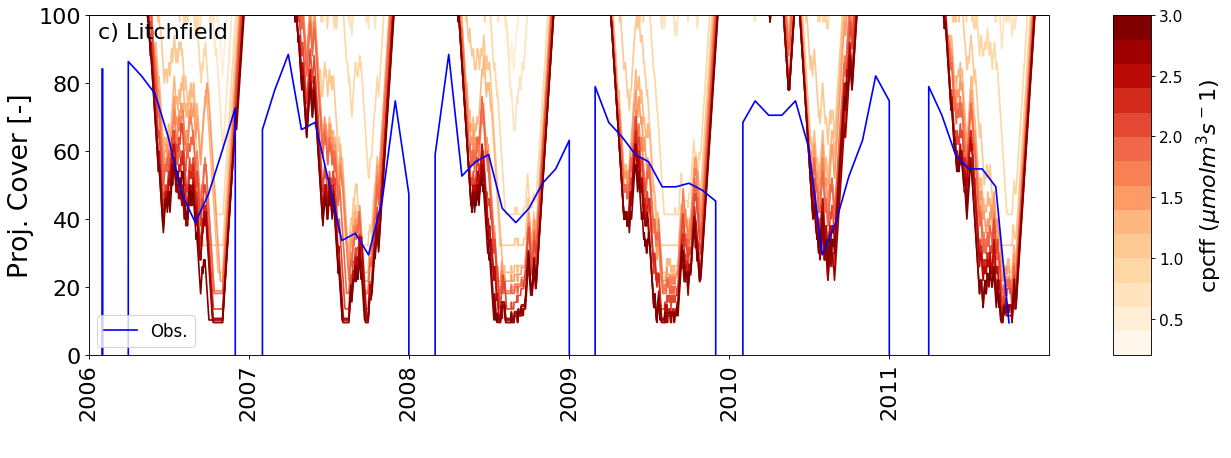

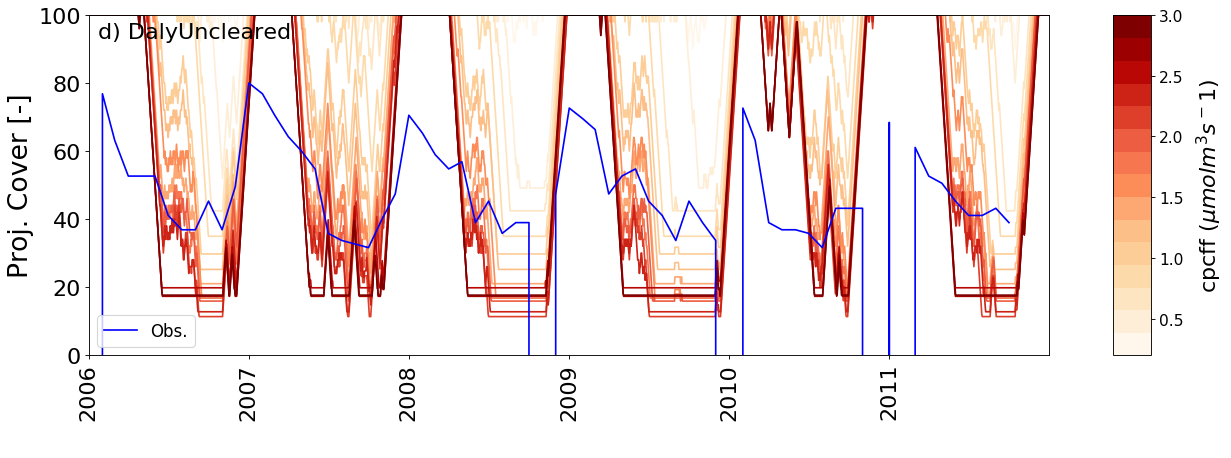

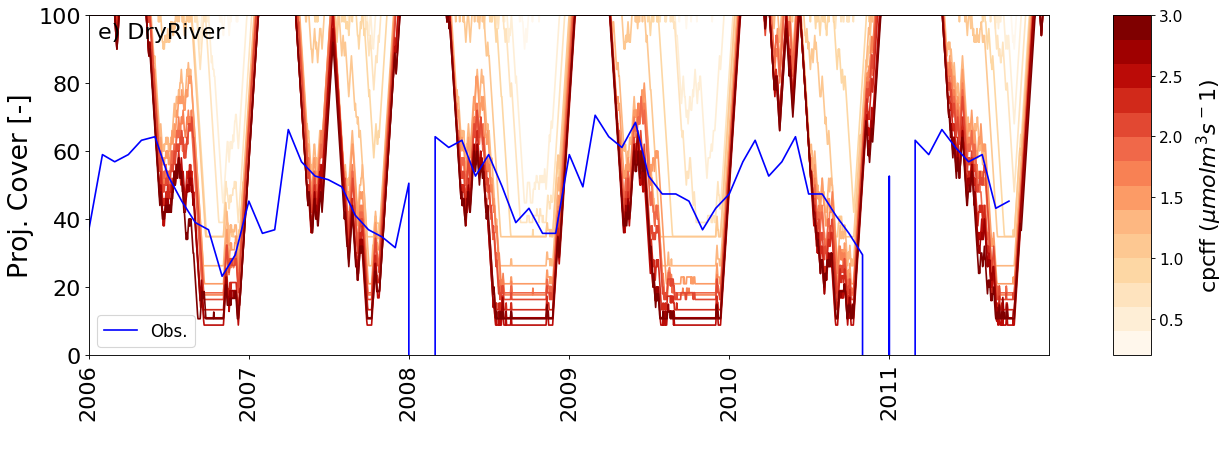

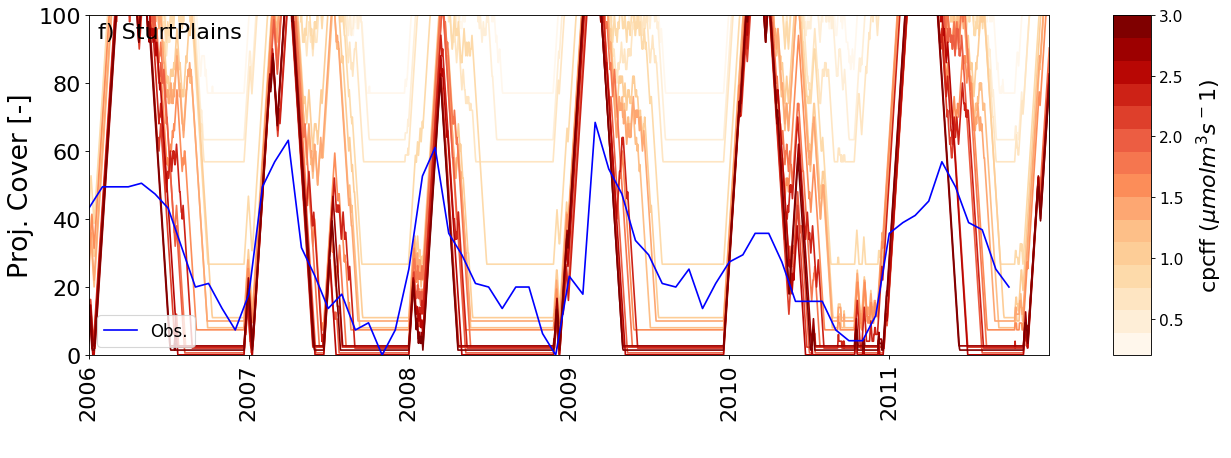

In [6]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "a) HowardSprings" --legend True --cbar_max 3.0 

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "b) AdelaideRiver" --legend True --cbar_max 3.0 


#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "c) Litchfield" --legend True --cbar_max 3.0 

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "d) DalyUncleared" --legend True --cbar_max 3.0 

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "e) DryRiver" --legend True --cbar_max 3.0 

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff ($\mu mol m^3 s^{-1})$"  --labels VOM VOM2 \
--title "f) SturtPlains" --legend True --cbar_max 3.0 


**Figure S3.4.** Timeseries of total vegetation cover (perennial trees and seasonal grasses) for the different sites (a-f) with in blue the fPar-based observations and the VOM-results for different values of the costfactor for water transport (color scale). The timing of the declining and rising limbs of the curves seem to match with the observations, but a the different values of the costfactor show especially during the dry season s trong sensitivity (i.e. the minimum vegetation cover varies strongly).  

## Effect on parameter values

<Figure size 1280x400 with 0 Axes>

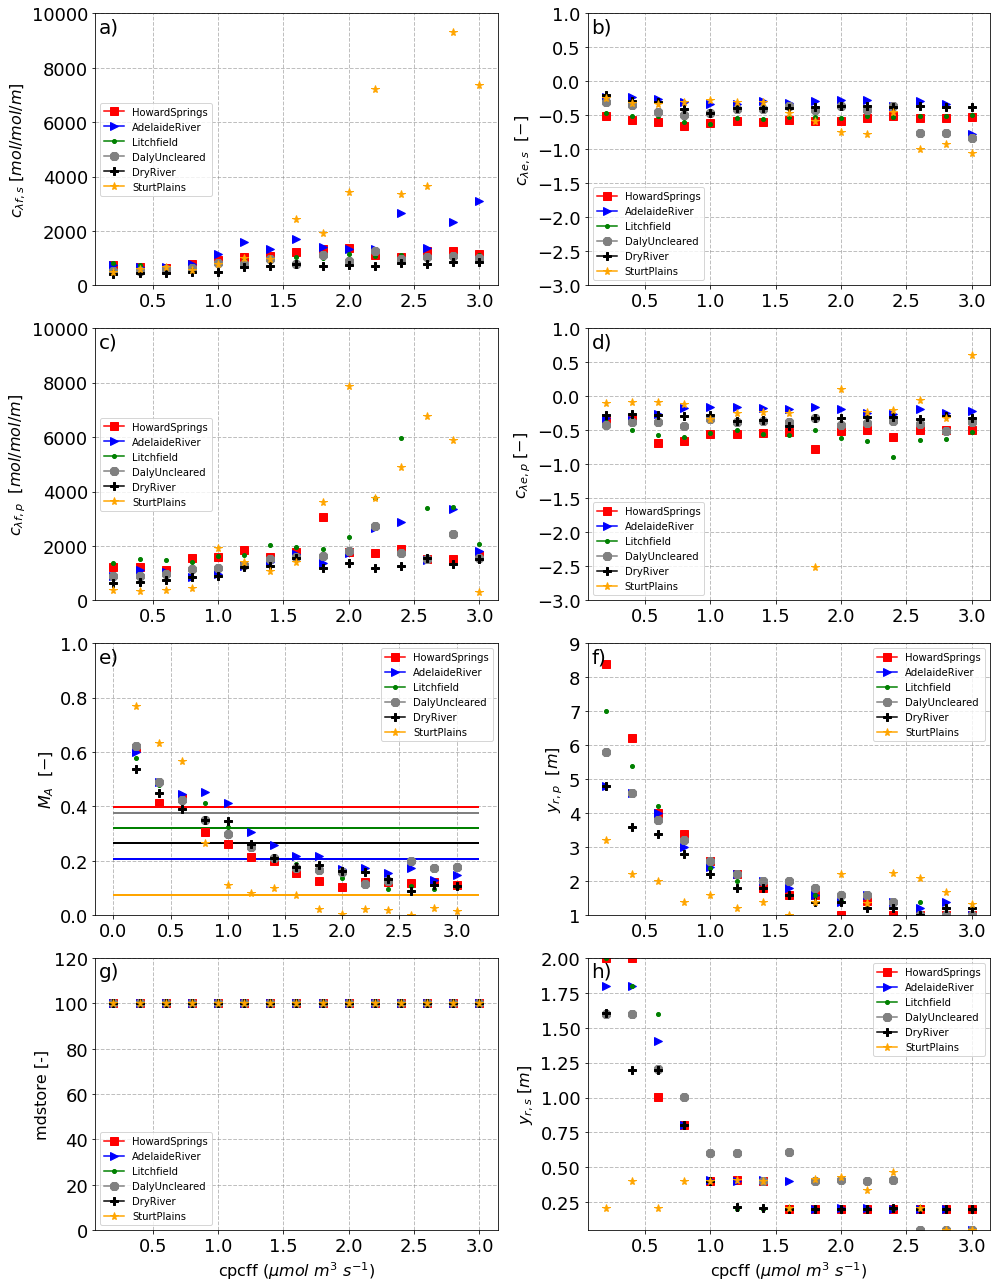

In [7]:
#plot parameters
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18)) 
ax = axes.flat

i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                  "/best/input/pars.txt")
            

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3.2, color = colors[ibasin] )

                    
                for tick in ax[i].xaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                for tick in ax[i].yaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                ax[i].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                    
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
        
ax[0].set_ylabel(r"$c_{\lambda f,s}$ $[mol/mol/m ]$", size=16 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10}, loc='center left')
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
    
ax[1].set_ylabel(r"$c_{\lambda e,s}$  $[-]$", size=16 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)
 
ax[2].set_ylabel(r"$c_{\lambda f,p}$  $[mol/mol/m ]$", size=16 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10}, loc='center left')
ax[2].text(0.01, 0.95, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

ax[3].set_ylabel(r"$c_{\lambda e,p}$ $[-]$", size=16 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})
ax[3].text(0.01, 0.95, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

ax[4].set_ylabel(r"$M_A$  $[-]$", size=16 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})
ax[4].text(0.01, 0.95, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

ax[5].set_ylabel(r"$y_{r,p}$  $[m]$", size=16 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})
ax[5].text(0.01, 0.95, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_ylabel("mdstore [-]", size=16 )  
ax[6].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=16 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})
ax[6].text(0.01, 0.95, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_ylabel(r"$y_{r,s}$ $[m]$", size=16 )  
ax[7].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=16 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})
ax[7].text(0.01, 0.95, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)



plt.tight_layout()
    
plt.show()




**Figure S3.5.** Optimal vegetation parameters for the different values of the water transport costfactor cpcff, for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation $y_{r,s}$. The lines for the parameter $M_{A,p}$ indicate the minimum vegetation cover during the dry season derived from fPar-values. 

<Figure size 1280x1040 with 0 Axes>

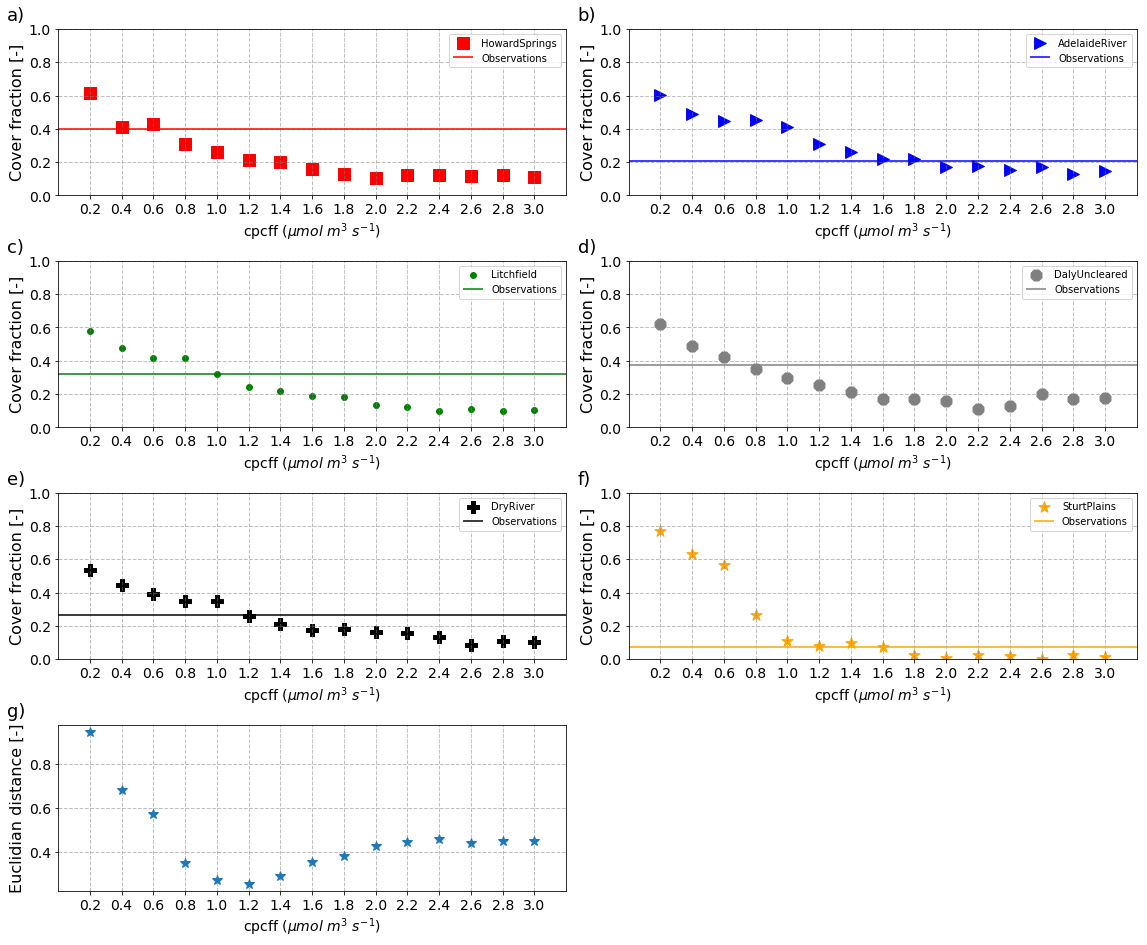

In [8]:
#plot parameters
cpcff_vals = np.arange(0.2,3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']
fig_lab = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']

fig=plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 13)) 
fig.delaxes(axes[3,1])
ax = axes.flat


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140, label=site)     
                #ax[ibasin].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[ibasin].hlines( cai_fpar[ibasin], 0, 3.2, color = colors[ibasin],label = "Observations" )
                ax[ibasin].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[ibasin].transAxes, size=18)
            else:
                ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140)     

                
            ax[ibasin].set_ylabel("Cover fraction [-]", size=16 )  
            ax[ibasin].set_ylim( 0, 1  ) 
            ax[ibasin].set_xlim( 0, 3.2  )    

            ax[ibasin].legend(prop={'size':10})
            #if(ibasin > 3):
                #ax[ibasin].set_xlabel("cpcff [-]", size=16 )  
            ax[ibasin].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=14 )  

            
            #ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            #            size=20, weight='bold')
            ax[ibasin].tick_params(axis='both', which='major', labelsize=14)
            ax[ibasin].set_xticks(cpcff_vals)
            ax[ibasin].set_xticklabels(cpcff_str)
            ax[ibasin].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
#combining the errors
for i_cpcff in range(len(cpcff_str)):
    ED[i_cpcff] = np.sqrt(np.sum(err[i_cpcff,:]**2))

ax[6].plot(cpcff_vals, ED, "*", markersize=10)
ax[6].set_ylabel("Euclidian distance [-]", size = 16 )  
#ax[1].set_ylim( 1, 9  )
ax[6].set_xlim( 0, 3.2  )    

#ax[6].legend(prop={'size':10})
ax[6].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[6].transAxes, 
            size=18)
ax[6].tick_params(axis='both', which='major', labelsize=14)
ax[6].set_xticks(cpcff_vals)
ax[6].set_xticklabels(cpcff_str)
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[6].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=14 )  


plt.tight_layout() 
plt.show()




**Figure 3.6.** Optimal vegetation parameters for the different values of the water transport costfactor cpcff. The lines indicate the minimum vegetation cover during the dry season derived from fPar-values. Also here, it can be seen that values between 0.4 $\mu mol/m^3/s$ and 1.8 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 0.4 $\mu mol/m^3/s$, AdelaideRiver =  1.8 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  0.8 $\mu mol/m^3/s$, DryRiver =  1.2 $\mu mol/m^3/s$, SturtPlains =  1.2 $\mu mol/m^3/s$).

## Relation with climate characteristics

In [9]:
def mean_annual(inputfile, var ,startyear, endyear, method):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data[var]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['fyear'][0]),int(data['fmonth'][0]),int(data['fday'][0])), 
                      datetime(int(data['fyear'][-1]),int(data['fmonth'][-1]),int(data['fday'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
                    
    if(method == "sum"):
        vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').sum() ) 
    if(method == "max"):
        vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').max() ) 
    if(method == "min"):
        vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').min() )

    
    return vals_ma      
                

In [10]:
prec_howard = mean_annual("../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")
prec_litch = mean_annual("../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")
prec_ade = mean_annual("../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")
prec_daly = mean_annual("../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")
prec_dry = mean_annual("../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")
prec_sturt = mean_annual("../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015, "sum")

prec_all = [prec_howard, prec_litch, prec_ade, prec_daly, prec_dry, prec_sturt  ]

In [11]:
tmax_howard = mean_annual("../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")
tmax_litch = mean_annual("../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")
tmax_ade = mean_annual("../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")
tmax_daly = mean_annual("../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")
tmax_dry = mean_annual("../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")
tmax_sturt = mean_annual("../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt", "tairmax" ,1995, 2015, "max")

tmax_all = [tmax_howard, tmax_litch, tmax_ade, tmax_daly, tmax_dry, tmax_sturt  ]

In [12]:
def calc_netrad( weatherdata_file, lat, startyear, endyear ):
    
    #calculate net radiation, following FAO

    weatherdata = np.genfromtxt(weatherdata_file, names=True  )    
    
    #constants
    sigma = 4.903*10**-9 #Stefan-Boltzman constant [MJ K-4 m-2 day-1]
    Gsc = 0.0820 #solar constant [MJ m-2 hour-1]
    n = 10 #220/31 #sunshine hours
    N = 10 #maximum sunshine hours
    
    #get data from VOM-dailyweather
    Rs = weatherdata["Radn"]    # incoming solar radiation [MJ m-2 day-1]
    Tmax = weatherdata["TMax"]  # Celsius
    Tmin = weatherdata["TMin"]  # Celsius
    ea = weatherdata["VP"] /10  # kPa

    #define time and dates
    time = np.arange(datetime(int(weatherdata['Year'][0]),int(weatherdata['Month'][0]),int(weatherdata['Day'][0])), 
                  datetime(int(weatherdata['Year'][-1]),int(weatherdata['Month'][-1]),int(weatherdata['Day'][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)
    time_pd = pd.date_range(time[0],periods=len( time ), freq='D')

    #day of year
    J = time_pd.dayofyear
    
    #inverse relative distance Earth-Sun
    dr =  1 + 0.033*np.cos(2*np.pi*J/365)  # [m?]

    phi=  (np.pi/180) * lat   #latitude [rad]
    
    #solar declination
    delta= 0.409*np.sin( (2*J*np.pi/365)  - 1.39 ) #[rad]
    
    #sunset hour angle
    ws =  np.arccos(-np.tan(phi)*np.tan(delta))

    #extraterrestrial radiation
    part1 = (24*60/np.pi) * Gsc * dr 
    part2 = ws*np.sin(phi)*np.sin(delta)
    part3 = np.cos(phi)*np.cos(delta)*np.sin(ws) 

    Ra =  part1*(part2+part3)  #[MJ m-2 hr-1]


    #Rso = Ra*z*0.75*2*10**-5
    Rso = Ra*(0.25+0.5*(n/N)) #clear-sky solar radiation [MJ m-2 day-1]

    Rns = (1-0.23) * Rs # shortwave radiation

    part1 = sigma*((Tmax+273.16)**4 + (Tmin+273.16)**4)/2
    part2 = 0.34-0.14*np.sqrt(ea)
    part3 = 1.35*Rs/Rso -0.35

    Rnl = part1 * part2 * part3 #net longwave radiation [MJ m-2 day-1]

    Rn = Rns - Rnl
    
    Rn_pd = pd.Series(Rn, index = time_pd)
    Rn_pd = Rn_pd[ (Rn_pd.index.year>=startyear) & (Rn_pd.index.year<=endyear)]
    
    return Rn_pd

In [13]:
def aridity(rn, input_vom, startyear, endyear):
       
    
    #input: results vom
    #precipitation
    #potential evaporation
    #net radiation
    
    weatherdata = np.genfromtxt(input_vom, names=True  )

    #define time and dates
    time = np.arange(datetime(int(weatherdata['Year'][0]),int(weatherdata['Month'][0]),int(weatherdata['Day'][0])), 
                  datetime(int(weatherdata['Year'][-1]),int(weatherdata['Month'][-1]),int(weatherdata['Day'][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)
    time_pd = pd.date_range(time[0],periods=len( time ), freq='D')
    
    
    lat_heat_vapor = 2.45   #[MJ/kg] 
    rho_w = 1000             #[kg/m3]

    prec = pd.Series(weatherdata['Rain'], index=time_pd)
    prec = prec[ (prec.index.year>=startyear) & (prec.index.year<=endyear)]
    #rn = np.array(rn)  
    ep = 1000*rn/(lat_heat_vapor*rho_w) #mm/d
    Lp = prec * lat_heat_vapor 
    
    
    #in terms of water, prec as base
    EpP = np.sum(ep) / np.sum(prec) 
        
    #in terms of energy  
    RnLp = np.sum(rn) / np.sum(Lp) #same as Ep/P    

    return EpP, RnLp


In [14]:
rn_howard = calc_netrad("../../data/VOM_input/HowardSprings/dailyweather.prn", -12.5,1995, 2015)
rn_litch = calc_netrad("../../data/VOM_input/Litchfield/dailyweather.prn", -13.1790,1995, 2015)
rn_ade = calc_netrad("../../data/VOM_input/AdelaideRiver/dailyweather.prn", -13.077,1995, 2015)
rn_daly = calc_netrad("../../data/VOM_input/DalyUncleared/dailyweather.prn", -14.1592,1995, 2015)
rn_dry = calc_netrad("../../data/VOM_input/DryRiver/dailyweather.prn", -15.2587833333333 ,1995, 2015)
rn_sturt = calc_netrad("../../data/VOM_input/SturtPlains/dailyweather.prn", -17.1507,1995, 2015)

aridity_howard = aridity(rn_howard, "../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
aridity_litch = aridity(rn_litch, "../../data/VOM_input/Litchfield/dailyweather.prn",1995, 2015)
aridity_ade = aridity(rn_ade, "../../data/VOM_input/AdelaideRiver/dailyweather.prn",1995, 2015)
aridity_daly = aridity(rn_daly, "../../data/VOM_input/DalyUncleared/dailyweather.prn",1995, 2015)
aridity_dry = aridity(rn_dry, "../../data/VOM_input/DryRiver/dailyweather.prn",1995, 2015)
aridity_sturt = aridity(rn_sturt, "../../data/VOM_input/SturtPlains/dailyweather.prn",1995, 2015)

aridity = [aridity_howard, aridity_litch, aridity_ade, aridity_daly, aridity_dry, aridity_sturt ]

In [15]:
startyear = 1995
endyear = 2015

rn_howard_ma = np.mean(rn_howard[ (rn_howard.index.year>=startyear) & (rn_howard.index.year<=endyear)].resample('A').sum() ) 
rn_litch_ma = np.mean(rn_litch[ (rn_litch.index.year>=startyear) & (rn_litch.index.year<=endyear)].resample('A').sum() ) 
rn_ade_ma = np.mean(rn_ade[ (rn_ade.index.year>=startyear) & (rn_ade.index.year<=endyear)].resample('A').sum() ) 
rn_daly_ma = np.mean(rn_daly[ (rn_daly.index.year>=startyear) & (rn_daly.index.year<=endyear)].resample('A').sum() ) 
rn_dry_ma = np.mean(rn_dry[ (rn_dry.index.year>=startyear) & (rn_dry.index.year<=endyear)].resample('A').sum() ) 
rn_sturt_ma = np.mean(rn_sturt[ (rn_sturt.index.year>=startyear) & (rn_sturt.index.year<=endyear)].resample('A').sum() ) 

rn_ma = [rn_howard_ma, rn_litch_ma, rn_ade_ma, rn_daly_ma, rn_dry_ma, rn_sturt_ma ]

In [16]:
def rainfall_seasonality(inputfile,startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data["Rain"]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['Year'][0]),int(data['Month'][0]),int(data['Day'][0])), 
                      datetime(int(data['Year'][-1]),int(data['Month'][-1]),int(data['Day'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
    vals_pd = vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)]
    Pma = np.mean(vals_pd.resample('A').sum() ) 

    Pmm = np.zeros(12) #mean monthly rainfall
    for i in range(1,13):
        Pmm_tmp = np.mean(vals_pd[vals_pd.index.month == i])
        Pmm[i-1] = Pmm_tmp
    
        
    seasonality =  (1/Pma) * np.sum( np.abs(Pmm - (Pma / 12)) )
        
    return seasonality      
                

In [17]:
seas_howard = rainfall_seasonality("../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
seas_litch = rainfall_seasonality("../../data/VOM_input/Litchfield/dailyweather.prn", 1995, 2015)
seas_ade = rainfall_seasonality("../../data/VOM_input/AdelaideRiver/dailyweather.prn", 1995, 2015)
seas_daly = rainfall_seasonality("../../data/VOM_input/DalyUncleared/dailyweather.prn", 1995, 2015)
seas_dry = rainfall_seasonality("../../data/VOM_input/DryRiver/dailyweather.prn" ,1995, 2015)
seas_sturt = rainfall_seasonality("../../data/VOM_input/SturtPlains/dailyweather.prn", 1995, 2015)

seas = [seas_howard, seas_litch, seas_ade, seas_daly, seas_dry, seas_sturt ]


In [18]:
def dry_season(inputfile,startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data["Rain"]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['Year'][0]),int(data['Month'][0]),int(data['Day'][0])), 
                      datetime(int(data['Year'][-1]),int(data['Month'][-1]),int(data['Day'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
    vals_pd = vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)]
    
    

    dry_period = np.zeros( len(np.arange(startyear,endyear+1))) #yearly dry periods
    i = 0
    for iyear in np.arange(startyear,endyear+1):
        tmp = vals_pd[vals_pd.index.year == iyear]
        dry_period[i] = tmp.value_counts().max()
        i = i + 1
    
        
    dryseason_duration =  np.mean(dry_period)
        
    return dryseason_duration      
                

In [19]:
drydur_howard = dry_season("../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
drydur_litch = dry_season("../../data/VOM_input/Litchfield/dailyweather.prn", 1995, 2015)
drydur_ade = dry_season("../../data/VOM_input/AdelaideRiver/dailyweather.prn", 1995, 2015)
drydur_daly = dry_season("../../data/VOM_input/DalyUncleared/dailyweather.prn", 1995, 2015)
drydur_dry = dry_season("../../data/VOM_input/DryRiver/dailyweather.prn" ,1995, 2015)
drydur_sturt = dry_season("../../data/VOM_input/SturtPlains/dailyweather.prn", 1995, 2015)

drydur = [drydur_howard, drydur_litch, drydur_ade, drydur_daly, drydur_dry, drydur_sturt  ]


In [20]:
#determine best cpcff
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
cpcff_best = np.zeros(6)


ibasin = 0
for site in study_sites:

    i_cpcff = 0
    

    for cpcff in  cpcff_str: 
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]              
            err[i_cpcff, ibasin] = np.abs(cai - cai_fpar[ibasin])
            
        except OSError:
            print('file not found')
         
        i_cpcff = i_cpcff + 1
        
        
    cpcff_best[ibasin] = cpcff_vals[err[:,ibasin] == min(err[:,ibasin])]
    ibasin = ibasin + 1    






<Figure size 1280x400 with 0 Axes>

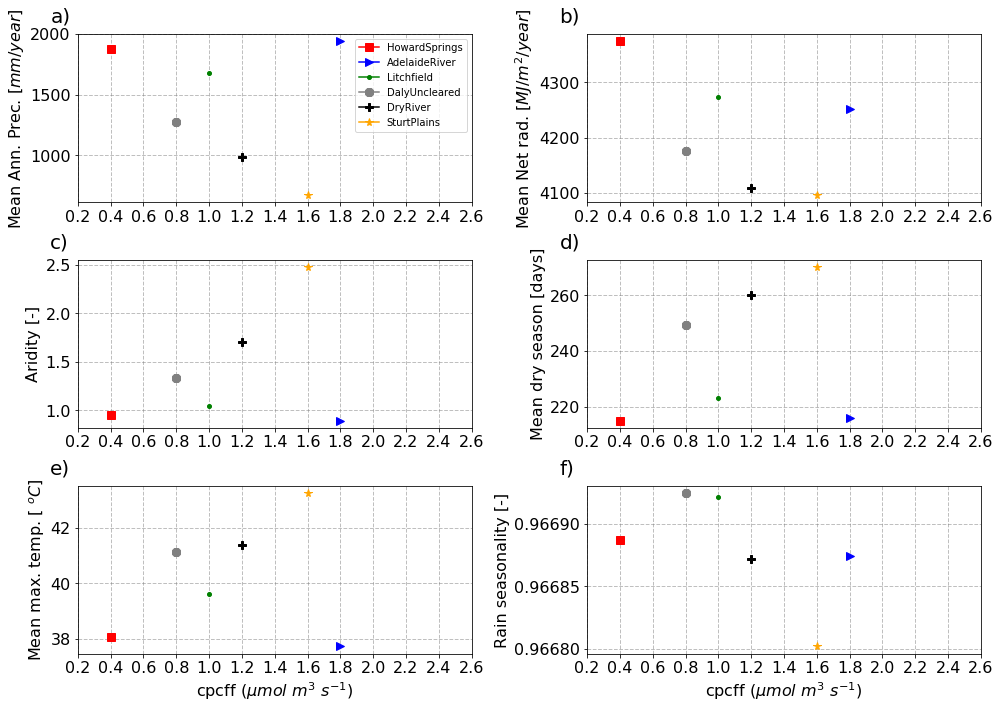

In [21]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

ylabel = ["Mean Ann. Prec. [$mm/year$]",
          r"Mean Net rad. [$MJ/m^{2}/year$]",
          "Aridity [-]",
          "Mean dry season [days]",
          "Mean max. temp. [ $^o C$]",
          "Rain seasonality [-]"        
         ]

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10)) 
ax = axes.flat

ibasin = 0

for site in study_sites:


    ax[0].plot(cpcff_best[ibasin], prec_all[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[1].plot(cpcff_best[ibasin], rn_ma[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[2].plot(cpcff_best[ibasin], aridity[ibasin][1], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[3].plot(cpcff_best[ibasin], drydur[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[4].plot(cpcff_best[ibasin], tmax_all[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[5].plot(cpcff_best[ibasin], seas[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     

    ibasin = ibasin + 1

    
ax[0].legend(prop={'size':10})

for i in range(0,6):
    ax[i].set_ylabel(ylabel[i], size=16 )  
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    ax[i].set_xticks(cpcff_vals)
    ax[i].set_xticklabels(cpcff_str)
    ax[i].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax[i].tick_params(axis='both', which='major', labelsize=16)

ax[4].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=16 )  
ax[5].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=16 )  

ax[0].text(-0.07, 1.07, "a)", transform=ax[0].transAxes,  size=20)
ax[1].text(-0.07, 1.07, "b)", transform=ax[1].transAxes,  size=20)
ax[2].text(-0.07, 1.07, "c)", transform=ax[2].transAxes,  size=20)
ax[3].text(-0.07, 1.07, "d)", transform=ax[3].transAxes,  size=20)
ax[4].text(-0.07, 1.07, "e)", transform=ax[4].transAxes,  size=20)
ax[5].text(-0.07, 1.07, "f)", transform=ax[5].transAxes,  size=20)

plt.tight_layout()
    
plt.show()




**Figure 3.7.** Values of the costfactor cpcff agains several climate indices, with a) mean annual rainfall, b) mean annual net radiation, c) aridity, d) mean length of the dry season, c) mean maximum temperature and d) rainfall seasonality, A linear relation seems to appear, but especially AdelaideRiver often occurs as an outlyer. This probably relates to the shallower groundwater tables at AdelaideRiver, which lead to different optimal values of the costfactor. 

## Influence on fluxes

<Figure size 1280x400 with 0 Axes>

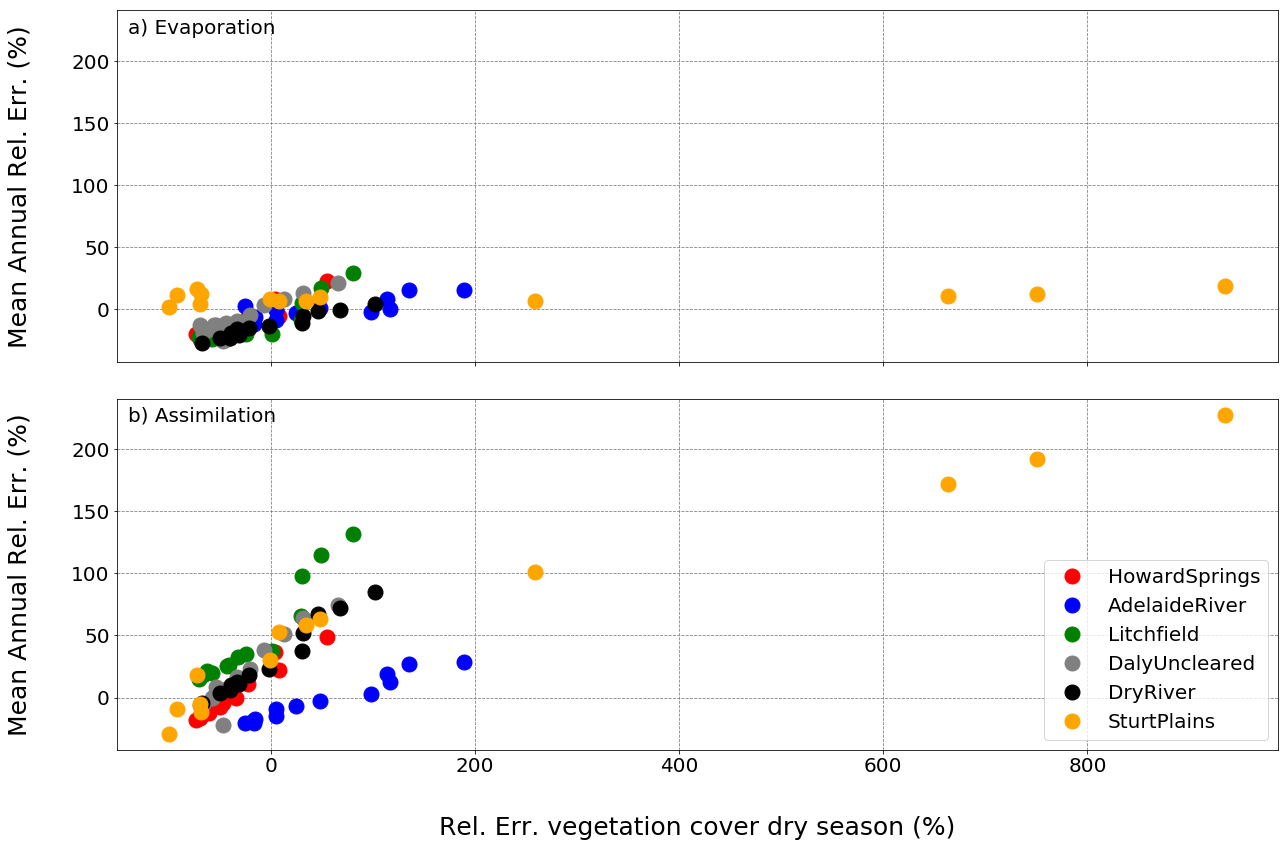

In [22]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(18, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:

    loc = 1
    i_cpcff = 0
    NCPmax = 0  

    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + label +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + label +
                      "/best/input/pars.txt")

            cai = params[4]
            err[i_cpcff, i] = 100*(cai - cai_fpar[i])/cai_fpar[i]
            
           
                
            if(loc  == 1):
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=site ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=site ) 
            else:
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i], markersize=15 ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
       
    i = i +1

ax[0].grid(b=True, which='major', color='grey', linestyle='--')
ax[1].grid(b=True, which='major', color='grey', linestyle='--')

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax[0].text(0.01, 0.95, "a) Evaporation", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[1].text(0.01, 0.95, "b) Assimilation", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

ax[1].set_xlabel(r'Rel. Err. vegetation cover dry season (%)', size = 25, labelpad=40)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(loc='lower right', fontsize = 20)
plt.tight_layout()
plt.show()

    


**Figure 3.8** The relative errors of the mean annual fluxes a) evaporation and b) assimilation versus the relative errors for the projective cover, for the different values of the costfactor cpcff. It can be seen that a larger error in vegetation cover during the dry season also leads to a large error in the resulting fluxes. 